In [1]:
import os
import re
import sys
import glob
import time
import uproot
import peakutils

import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from matplotlib.colors import LogNorm

from scipy.signal import savgol_filter

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/') ## Choose right path
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"]      = 14

In [4]:
import matplotlib

# Set Palatino as the serif font
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif']  = 'Palatino'

In [5]:
fav_col = '#418094'

In [6]:
normal_chs = range(9)
trigg_chs  = [9, 10, 11]

In [7]:
filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-11_25_2024-file.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

In [9]:
ch   = 9
wfs  = np.array(RawTree[f'chan{ch}/rdigi'].array())
swfs = np.array([blr.pmt_deconvolver(wf, wf_range_bsl=(0, 650), std_lim=30) for wf in wfs])

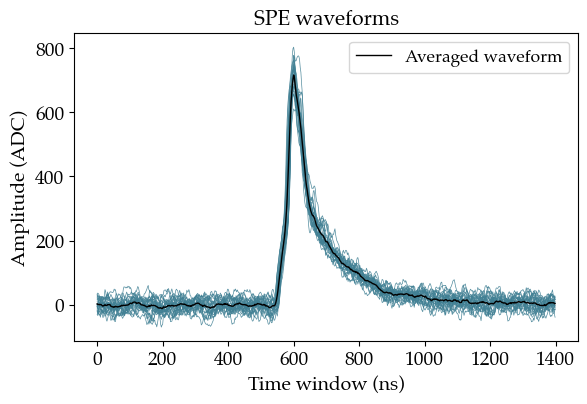

In [35]:
max_swfs = np.max(swfs, axis=1)
spe_rng  = (500, 900)

plt.figure(figsize=(6.5, 4))

sel_swfs = (max_swfs > spe_rng[0]) & (max_swfs < spe_rng[1])
swfs0    = swfs[sel_swfs]
all_wfs_rng = []
for i, wf in enumerate(swfs0[:30]):
    if i in [7, 12, 13, 19, 20, 21, 24]:
        continue
    wf_x = 2*np.arange(len(wf[np.argmax(wf)-300:np.argmax(wf)+400]))
    wf_y = wf[np.argmax(wf)-300:np.argmax(wf)+400]
    if len(wf_y)!=700:
        continue
    all_wfs_rng.append(wf_y)
    plt.plot(wf_x, wf_y, lw=0.5, color=fav_col, alpha=0.9)

average_waveform_spe = np.mean(np.array(all_wfs_rng), axis=0)
wf_x_ave = 2*np.arange(len(wf[np.argmax(average_waveform_spe)-300:np.argmax(average_waveform_spe)+400]))
plt.plot(wf_x_ave, average_waveform_spe, label='Averaged waveform', color='k', lw=1)
plt.title(f'SPE waveforms', fontsize=15)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.legend(fontsize=12.5)
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/1PE_wfs_and_average_ch9.pdf', bbox_inches='tight')
plt.show()

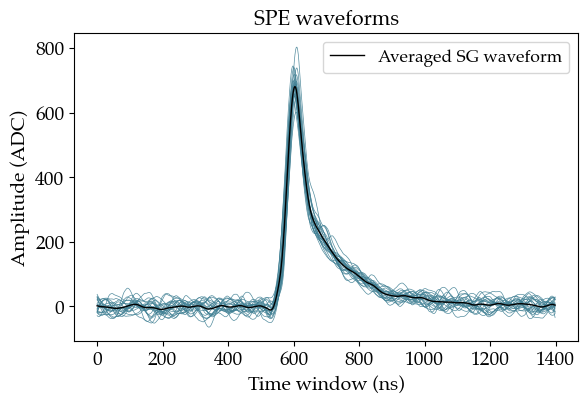

In [37]:
max_swfs = np.max(swfs, axis=1)
spe_rng  = (500, 900)

plt.figure(figsize=(6.5, 4))

sel_swfs = (max_swfs > spe_rng[0]) & (max_swfs < spe_rng[1])
swfs0    = swfs[sel_swfs]
all_wfs_rng = []
for i, wf in enumerate(swfs0[:30]):
    if i in [7, 12, 13, 19, 20, 21, 24]:
        continue
    wf_x   = 2*np.arange(len(wf[np.argmax(wf)-300:np.argmax(wf)+400]))
    wf_y   = wf[np.argmax(wf)-300:np.argmax(wf)+400]
    sgwf_y = savgol_filter(wf_y, window_length=30, polyorder=3)
    if len(wf_y)!=700:
        continue
    all_wfs_rng.append(sgwf_y)
    plt.plot(wf_x, sgwf_y, lw=0.5, color=fav_col, alpha=0.9)

average_waveform_sg_spe = np.mean(np.array(all_wfs_rng), axis=0)
wf_x_ave = 2*np.arange(len(wf[np.argmax(average_waveform_sg_spe)-300:np.argmax(average_waveform_sg_spe)+400]))
plt.plot(wf_x_ave, average_waveform_sg_spe, label='Averaged SG waveform', color='k', lw=1)
plt.title(f'SPE waveforms', fontsize=15)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.legend(fontsize=12.5)
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/1PE_wfs_and_average_SG_ch9.pdf', bbox_inches='tight')
plt.show()

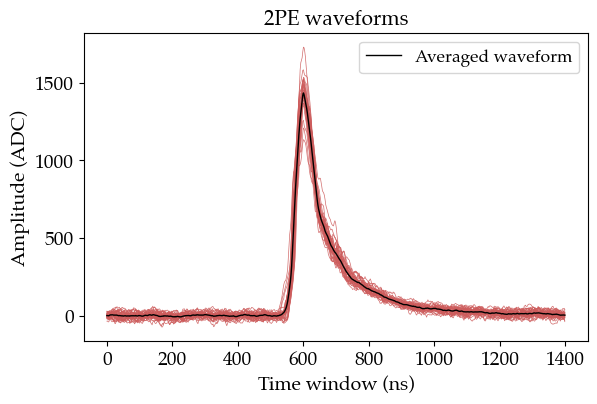

In [40]:
max_swfs = np.max(swfs, axis=1)
rng_2pe  = (1000, 1800)

plt.figure(figsize=(6.5, 4))

sel_swfs = (max_swfs > rng_2pe[0]) & (max_swfs < rng_2pe[1])
swfs0    = swfs[sel_swfs]
all_wfs_rng = []
for i, wf in enumerate(swfs0[:40]):
    if i in [4, 10, 13, 15, 23, 27, 36]:
        continue
    wf_x = 2*np.arange(len(wf[np.argmax(wf)-300:np.argmax(wf)+400]))
    wf_y = wf[np.argmax(wf)-300:np.argmax(wf)+400]
    if len(wf_y)!=700:
        continue
    all_wfs_rng.append(wf_y)
    plt.plot(wf_x, wf_y, lw=0.5, color='indianred', alpha=0.9)

average_waveform_spe = np.mean(np.array(all_wfs_rng), axis=0)
wf_x_ave = 2*np.arange(len(wf[np.argmax(average_waveform_spe)-300:np.argmax(average_waveform_spe)+400]))
plt.plot(wf_x_ave, average_waveform_spe, label='Averaged waveform', color='k', lw=1)
plt.title(f'2PE waveforms', fontsize=15)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.legend(fontsize=12.5)
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/2PE_wfs_and_average_ch9.pdf', bbox_inches='tight')
plt.show()

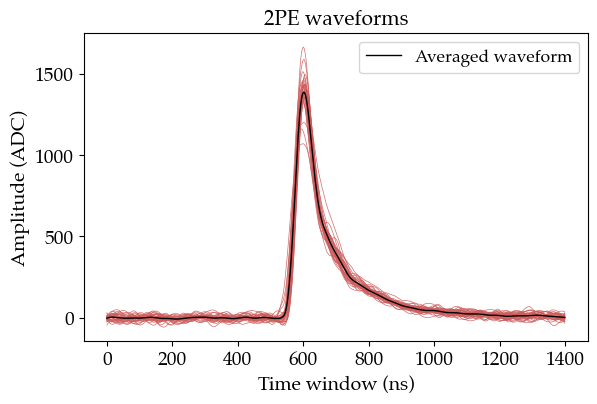

In [39]:
max_swfs = np.max(swfs, axis=1)
rng_2pe  = (1000, 1800)

plt.figure(figsize=(6.5, 4))

sel_swfs = (max_swfs > rng_2pe[0]) & (max_swfs < rng_2pe[1])
swfs0    = swfs[sel_swfs]
all_wfs_rng = []
for i, wf in enumerate(swfs0[:40]):
    if i in [4, 10, 13, 15, 23, 27, 36]:
        continue
    wf_x = 2*np.arange(len(wf[np.argmax(wf)-300:np.argmax(wf)+400]))
    wf_y = wf[np.argmax(wf)-300:np.argmax(wf)+400]
    sgwf_y = savgol_filter(wf_y, window_length=30, polyorder=3)
    if len(wf_y)!=700:
        continue
    all_wfs_rng.append(sgwf_y)
    plt.plot(wf_x, sgwf_y, lw=0.5, color='indianred', alpha=0.9)

average_waveform_sg_2pe = np.mean(np.array(all_wfs_rng), axis=0)
wf_x_ave = 2*np.arange(len(wf[np.argmax(average_waveform_sg_2pe)-300:np.argmax(average_waveform_sg_2pe)+400]))
plt.plot(wf_x_ave, average_waveform_sg_2pe, label='Averaged waveform', color='k', lw=1)
plt.title(f'2PE waveforms', fontsize=15)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.legend(fontsize=12.5)
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/2PE_wfs_and_average_sg_ch9.pdf', bbox_inches='tight')
plt.show()

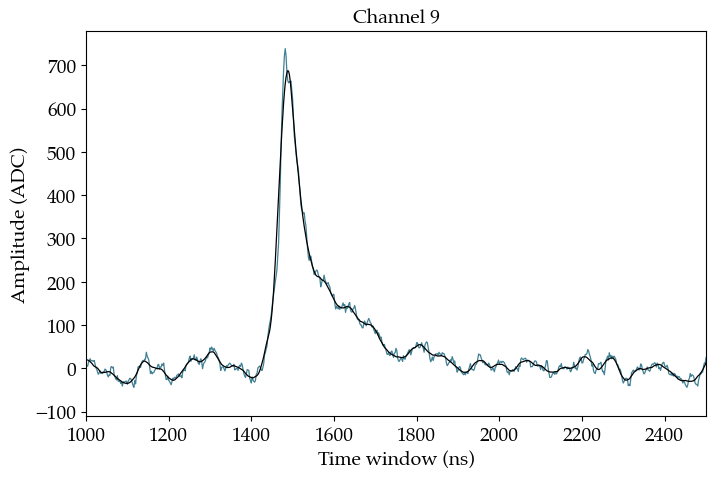

In [13]:
for wf in swfs[:1]:
    sgwf = savgol_filter(wf, window_length=30, polyorder=3)
    plt.plot(2*np.arange(len(wf)),   wf,   lw=0.9, color=fav_col)
    plt.plot(2*np.arange(len(sgwf)), sgwf, lw=0.9, color='k')

plt.title(f'Channel {ch}', fontsize=14)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.xlim(1000, 2500)
plt.show()

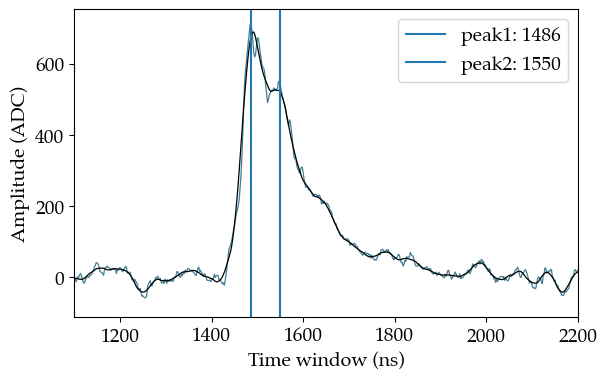

In [52]:
max_swfs = np.max(swfs, axis=1)
spe_rng  = (500, 900)

plt.figure(figsize=(6.5, 4))

sel_swfs = (max_swfs > spe_rng[0]) & (max_swfs < spe_rng[1])
swfs0    = swfs[sel_swfs]
all_wfs_rng = []
for i, wf in enumerate(swfs0[:30]):
    if i in [7]:
        sgwf = savgol_filter(wf, window_length=30, polyorder=3)
        plt.plot(2*np.arange(len(wf)),   wf,   lw=0.9, color=fav_col)
        plt.plot(2*np.arange(len(sgwf)), sgwf, lw=0.9, color='k')
        plt.axvline(2*np.argmax(wf), label=f'peak1: {np.round(2*np.argmax(wf))}')
        plt.axvline(1550, label=f'peak2: 1550')

plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.xlim(1100, 2200)
plt.legend()
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/1PE_wfs_and_average_ch9.pdf', bbox_inches='tight')
plt.show()

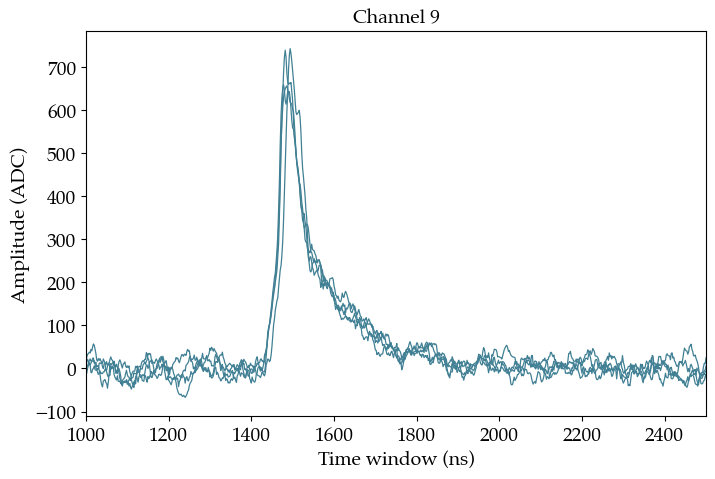

In [17]:
single_pe_rng = (500, 1000)
for wf in swfs[:5]:
    sgwf   = savgol_filter(wf, window_length=30, polyorder=3)
    max_wf = np.max(wf)
    if (max_wf>single_pe_rng[0]) & (max_wf<single_pe_rng[1]):
        plt.plot(2*np.arange(len(wf)),   wf,   lw=0.9, color=fav_col)
        #plt.plot(2*np.arange(len(sgwf)), sgwf, lw=0.9, color='k')

plt.title(f'Channel {ch}', fontsize=14)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.xlim(1000, 2500)
plt.show()